# Estructuras de programación en R

En R, al igual que en otros lenguajes , hay muchos casos en los que es posible que se  desee ejecutar código de forma condicional o ejecutar código similar repetidamente.

La ejecución condicionada vectorizada a través de la función `ifelse` es también parte de R. Vamos a ver estas estructuras condicionales  así como los tres bucles más simples (`for`, `while` y `repeat`), que de nuevo deben ser razonablemente familiares de otros lenguajes. Debido a la naturaleza vectorizada de R y algunas alternativas más estéticas, estos bucles son menos utilizados en R de lo que se pueda  esperar.

## Flujo de control

Hay muchas ocasiones en las que no sólo se desea ejecutar una declaración tras otra: se necesita controlar el flujo de ejecución. Normalmente esto significa que sólo desea ejecutar algún código si se cumple una condición, para ello existen algunas formas de control, que pasamos a desarrollar:

### if y else 

La forma más simple de control de flujo es la ejecución condicional usando `if`. `if` toma un valor lógico (más precisamente, un vector lógico de longitud uno) y ejecuta la siguiente instrucción sólo si ese valor es `TRUE`:

In [1]:
if(TRUE) message("Es cierto!")
## Eso fue cierto
if(FALSE) message("No es cierto!")

Es cierto!


In [2]:
# Usando NA, produce un error

if(NA) message("Quien sabe si fue cierto ?")

ERROR: Error in if (NA) message("Quien sabe si fue cierto ?"): valor ausente donde TRUE/FALSE es necesario


Donde se tenga un valor `NA` se podría ejecutarlo usando `is.na`:

In [3]:
if(is.na(NA)) message("Quien sabe si fue cierto ?")

Quien sabe si fue cierto ?


Por supuesto, la mayor parte del tiempo, no  pasaremos  valores `TRUE` o `FALSE`. En su lugar, colocaremos  una variable o una expresión: si supieras que la sentencia iba a ejecutarse de antemano, no necesitaría la cláusula `if`. En este ejemplo siguiente, `runif(1)` genera un número aleatorio uniformemente distribuido entre `0` y `1`. Si ese valor es superior a `0,5`, entonces se muestra un mensaje.

In [4]:
if(runif(1) > 0.5) message("Este mensaje aparece con un  50% probabilidad.")

Si desea condicionalmente ejecutar varias declaraciones, puede envolverlas en llaves:

In [5]:
x <- 3
if(x > 2)
{
    y <- 2 * x
    z <- 3 * y
}

El siguiente paso en la complejidad de `if` es incluir una declaración `else`. El código que sigue a una instrucción `else` se ejecuta si la condición `if` era `FALSE`:

In [6]:
if(FALSE)
{
    message("Esto no se ejecuta....")
} else
{
    message("esto deberia ejecutarse.")
}

esto deberia ejecutarse.


Una cosa importante a recordar es que la declaración `else`  debe ocurrir en la misma línea que la llave de cierre de la cláusula `if`. Si  mueves esto  a la siguiente línea, produce un error:

In [7]:
if(FALSE)
{
    message("Esto no se ejecuta...")
}
else
{
    message("tenemos un error antes de llegar aqui!.")
}

ERROR: Error in parse(text = x, srcfile = src): <text>:5:1: inesperado 'else'
4: }
5: else
   ^


Las condiciones múltiples se pueden definir combinando `if` y `else` repetidamente. Observe que `if` y `else` son dos palabras separadas, pero hay una función `ifelse` que hace algo ligeramente diferente.

In [ ]:
(r <- round(rnorm(2), 1))

(x <- r[1] / r[2])

if(is.nan(x))
{
    message("x es un NA")
} else if(is.infinite(x))
{
    message("x es infinito")
} else if(x > 0)
{
    message("x es positivo")
} else if(x < 0)
{
    message("x es negativo")
} else
{
    message("x es cerp")
}
## x is positivo

R, a diferencia de muchos lenguajes, tiene un truco ingenioso que le permite reordenar el código y hacer la asignación condicional. En el siguiente ejemplo, `Re` devuelve el componente real de un número complejo (`Im` devuelve el componente imaginario):

In [9]:
x <- sqrt(-1 + 0i)
(resultado <- if(Re(x) == 0) "real" else "imaginario")

[1] "real"

###  Vectorizado if

La instrucción estándar `if` toma un único valor lógico. Si pasas un vector lógico con una longitud de más de uno (!no lo hagas!), R te advertirá que has dado varias opciones y sólo se usará la primera:

In [10]:
if(c(TRUE, FALSE)) message("dos opciones")

Warning message in if (c(TRUE, FALSE)) message("dos opciones"):
“la condición tiene longitud > 1 y sólo el primer elemento será usado”dos opciones


Dado que gran parte de R es vectorizada, también es vectorizado el control de flujo, en forma de la función `ifelse`. `ifelse` toma tres argumentos. El primero es un vector lógico de condiciones. El segundo contiene valores que se devuelven cuando el primer vector es `TRUE`. El tercero contiene valores que se devuelven cuando el primer vector es `FALSE`. En el siguiente ejemplo, `rbinom` genera números aleatorios de una distribución binomial para simular el lanzamiento de una  moneda :

In [11]:
ifelse(rbinom(10, 1, 0.5), "Cara", "Sello")

[1] "Cara"  "Cara"  "Sello" "Sello" "Sello" "Sello" "Cara"  "Cara"  "Cara" 
[10] "Cara"

`ifelse` también puede aceptar vectores en el segundo y tercer argumento. Estos deben ser del mismo tamaño que el primer vector (si los vectores no son del mismo tamaño, entonces los elementos en el segundo y tercer argumento son reciclados o ignorados para que se tenga el mismo tamaño que el primero):

In [12]:
(yn <- rep.int(c(TRUE, FALSE), 6))

[1]  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE  TRUE FALSE

In [13]:
ifelse(yn, 1:3, -1:-12)

[1]   1  -2   3  -4   2  -6   1  -8   3 -10   2 -12

Si hay  valores `NA` en el argumento de la condición, entonces   los valores  correspondientes en el resultado son `NA` también:

In [14]:
yn[c(3, 6, 9, 12)] <- NA
ifelse(yn, 1:3, -1:-12)

[1]   1  -2  NA  -4   2  NA   1  -8  NA -10   2  NA

### Múltiple selección

Código con muchas otras declaraciones puede convertirse rápidamente en engorroso para leer. En tales circunstancias, un código más bonito a veces se puede lograr con una llamada a la función `switch`. El uso más común toma como un  primer argumento una expresión que devuelve una cadena, seguida de varios argumentos con nombres que proporcionan resultados cuando el nombre coincide con el primer argumento. Los nombres deben coincidir exactamente con el primer argumento. 

Se pueden ejecutar expresiones múltiples encerrándolas entre llaves:

In [15]:
(letra_griega <- switch(
    "gamma",
    alpha = 1,
    beta = sqrt(4),
    gamma =
    {
        a <- sin(pi / 3)
        4 * a ^ 3
    }
))

[1] 2.598076

Si no coinciden los nombres, entonces `switch` (invisible) devuelve NULL:

In [16]:
(letra_griega <- switch(
    "delta",
    alpha = 1,
    beta = sqrt(4),
    gamma =
    {
        a <- sin(pi / 3)
        4 * a ^ 3
    }
))

NULL

Para estas circunstancias, puede proporcionar un argumento sin nombre que coincide cuando nada más lo hace:

In [18]:
(letra_griega <- switch(
    "delta",
    alpha = 1,
    beta = sqrt(4),
    gamma =
    {
        a <- sin(pi / 3)
        4 * a ^ 3
    },
    5
))

[1] 5

`switch` también puede tomar un primer argumento que devuelve un entero. En este caso los argumentos restantes no necesitan nombres: el siguiente argumento se ejecuta si el primer argumento se resuelve a `1`, el argumento que sigue se ejecuta si el primer argumento se resuelve a `2` y así sucesivamente:

In [19]:
switch(
    3,
    "first",
    "second",
    "third",
    "fourth"
)

[1] "third"

Como habrás notado, ningún argumento por defecto es posible en este caso. También es bastante engorroso si desea probar enteros grandes, ya que tendrá que proporcionar muchos argumentos. En estas circunstancias, lo mejor es convertir el primer argumento en una cadena y utilizar la primera sintaxis:

In [20]:
switch(
    as.character(2147483647),
    "2147483647" = "un gran  numero",
    "otro numero"
)

[1] "un gran  numero"

###  Ejemplos 

1 . Un número entero es lanzado uniformemente aleatorio desde $\{1,\dots, 1000 \}$ tal que cada número es equiprobable. Veamos la probabilidad que el número lanzado sea divisible por `3, 5` o `6`.

In [22]:
# simdivis() simula un lanzamiento 

simdivis <- function() {
    num <- sample(1:1000,1)
    if (num%%3==0 || num%%5==0 || num%%6==0) 1 else 0 # uso de if-else
    }
simlista <- replicate(1000, simdivis())
mean(simlista)

[1] 0.463

2 . Usa switch para encontrar un saludo en diferentes idiomas.

In [28]:
x <- letters[floor(1+runif(1,0,4))]
y <- switch(x,
            a='Bonjour',
            b='Gutten Tag',
            c='Hello',
            d='Konnichi wa',
           )
y

[1] "Bonjour"

3 . Sea `x` un vector booleano, cuenta el número de secuencias de ceros (por ejemplo, en `00101001010110`, hay `6` secuencias de ceros : `00 0 00 0 0  0`). Cuenta  el número de secuencias de `1`. Cuenta  el número total de secuencias. La misma pregunta para un factor con más de dos niveles.

In [31]:
n <- 50
x <- sample(0:1, n, replace=T, p=c(.2,.8))

# Numero de secuencias 

sum(abs(diff(x)))+1

# Numbero de secuencias de  1's.

f <- function (x, v=1){ 
    x <- diff(x==v)
    x <- x[x!=0]
    if(x[1]==1)
        sum(x==1)
    else
        1+sum(x==1)
}        
f(x,1)
        
# Numbero de secuencias de   0's.    
f(x,0)

[1] 15

[1] 8

[1] 7

In [33]:
# Suma de secuencias de 0 y 1

n <- 50
k <- 4
x <- sample(1:k, n, replace=T)
# Con un bucle
        
s <- 0
for (i in 1:4) {
    s <- s + f(x,i)
}
s
# Utilizando no bucles 

a <- apply(matrix(1:k,nr=1,nc=k), 2, function (i) { f(x,i) } )
a 
sum(a)

[1] 38

[1] 10  7 11 10

[1] 38

4 . Encuentra las secuencias de 1's de longitud al menos `k` en una matriz `n x m`. Presenta el resultado como una tabla.

In [37]:
f1 <- function (M,k) {
    x <- c(0,M,0)
    #Inicio de la secuencia de 1's
    inicio <- which( diff(x) == 1 )
    # Final de la secuencias de 1's
    final <- which( diff(x) == -1 ) -1
    # final -inicio = longitud de las secuencias
    cbind(inicio,final)[ final-inicio >= k, ]
}

n <- 50
m <- 50
M <- matrix( sample(0:1, n*m, replace=T, prob=c(.2,.8)), nr=n, nc=m )
res <- apply(M, 1, f1, k=10)

# Agregamos numero de linea

i <- 0
res <- lapply(res, function (x) { 
    x <- matrix(x, nc=2)
    i <<- i+1
    cbind(numlinea=rep(i,length(x)/2), inicio =x[,1], final=x[,2])
})
# Presentamos el resultado como una tabla

do.call('rbind', res)   

numlinea,inicio,final
1,18,28
4,6,18
6,25,35
7,13,23
8,10,32
9,6,21
12,20,31
15,22,32
16,17,34
17,15,25


## Bucles

Hay tres tipos de bucles en R: `repeat`, `while`, y `for` y aunque la  vectorización  muestra que nos los necesita tanto en R como en otros lenguajes, todavía pueden ayudar en la ejecución repetida del código.

###  El bucle repeat

El bucle más fácil de dominar en R es `repeat`. Todo lo que hace es ejecutar el mismo código una y otra vez hasta que le diga que se detenga.  En general, si queremos que nuestro código se complete antes del final del universo, es necesario incluir una sentencia `break`. 

In [38]:
i<- 1
repeat{
  print(i)
  i <- i +1
  if(i > 5)
    {break}
}

[1] 1
[1] 2
[1] 3
[1] 4
[1] 5


In [40]:
# Usamos sample para retornar una accion en cada iteracion del bucle

repeat
{
    message("Hoy es un dia de obligaciones!")
    accion <- sample(
        c(
            "Aprender R",
            "Estudiar CM-274",
            "Leer el manga de One Piece",
            "Salir con Jessica"
        ),
        1
    )
    message("accion = ", accion)
    if(accion == "Leer el manga de One Piece") break
}

Hoy es un dia de obligaciones!
accion = Salir con Jessica
Hoy es un dia de obligaciones!
accion = Leer el manga de One Piece


A veces, en lugar de salir del bucle, sólo queremos saltar el resto de la iteración actual e iniciar la siguiente iteración, para ello usamos la declaración `next`:


In [44]:
repeat
{
    message("Hoy es un dia de obligaciones!")
    accion <- sample(
        c(
            "Aprender R",
            "Estudiar CM-274",
            "Leer el manga de One Piece",
            "Salir con Jessica"
        ),
        1
    )
    if(accion == "Aprender R")
    {
        message(" Pasar a la siguiente iteracion por favor")
        next
    }
    message("accion = ", accion)
    if(accion == "Leer el manga de One Piece") break
}

Hoy es un dia de obligaciones!
 Pasar a la siguiente iteracion por favor
Hoy es un dia de obligaciones!
accion = Salir con Jessica
Hoy es un dia de obligaciones!
accion = Salir con Jessica
Hoy es un dia de obligaciones!
accion = Leer el manga de One Piece


### Bucle while

Los bucles `while` es el bucle `repeat` pero  hacia atrás. En lugar de ejecutar algún código y luego comprobar si el bucle debe terminar, verifica  primero el código  y luego (tal vez) se  ejecuta. Dado que la comprobación ocurre al principio, es posible que el contenido del bucle nunca se ejecute (a diferencia del bucle  `repeat`). El ejemplo siguiente se comporta de forma similar al ejemplo anterior con `repeat`:

In [45]:
accion <- sample(
    c(
        "Aprender R",
        "Estudiar CM-274",
        "Leer el manga de One Piece",
        "Salir con Jessica"
    ),
    1
)

while(accion != "Salir con Jessica"){
    
    message("Hoy es un buen dia")
     accion <- sample(
        c(
            "Aprender R",
            "Estudiar CM-274",
            "Leer el manga de One Piece",
            "Salir con Jessica"
        ),
        1
    )
    message("accion = ", accion)
}

Hoy es un buen dia
accion = Estudiar CM-274
Hoy es un buen dia
accion = Aprender R
Hoy es un buen dia
accion = Salir con Jessica


In [46]:
# Un ejemplo numerico

i <- 0
while (i < 14){
  i <- i + 2
  print(i)
}

[1] 2
[1] 4
[1] 6
[1] 8
[1] 10
[1] 12
[1] 14


In [47]:
# Un camino aleatorio con While

x=0
n=0
set.seed(333)
while (x <= 10) {
  n=n+1
  x=x+rnorm(1,mean=.5,sd=1)
  }

print(paste ("n = ", n, ", x = ",round(x,2) )) 

[1] "n =  26 , x =  11.05"


### Bucle for 

El tercer tipo de bucle se utiliza cuando se sabe exactamente cuántas veces desea que el código se repita. El bucle `for` acepta una variable de iteración y un vector.  La sintaxis  para el bucle `for` es 

```
for (nombre in valores ) expresion
```

El bucle `for`, iteraciona a través de los componentes `nombre` de `valores` uno a la vez. `nombre` toma el valor de cada elemento sucesivo de `valores`, hasta que  se complete sus componentes. 

In [48]:
for(i in 1:5) message("i = ", i)

i = 1
i = 2
i = 3
i = 4
i = 5


In [49]:
lenguajes <- c("Python", "JS", "C", "C++", "R", "Bash")
for(l in lenguajes){
  print(l)
}

[1] "Python"
[1] "JS"
[1] "C"
[1] "C++"
[1] "R"
[1] "Bash"


Si deseamos ejecutar varias expresiones, como con otros bucles, estas expresiones deben estar rodeadas de llaves:

In [50]:
for(i in 1:5)
{
    j <- i ^ 3
    message("j = ", j)
}

j = 1
j = 8
j = 27
j = 64
j = 125


Los  bucles `for ` son flexibles en el sentido de que no se limitan a números enteros. Podemos pasar vectores de caracteres, vectores lógicos o listas:

In [52]:
for(yn in c(TRUE, FALSE, NA))
{
    message("La declaracion es "  , yn)
}

La declaracion es TRUE
La declaracion es FALSE
La declaracion es NA


In [53]:
# Otro ejemplo

l <- list(
    pi,
    LETTERS[1:5],
    charToRaw("R es superfacil..."),
    list(
        TRUE
    )
)
for(i in l)
{
    print(i)
}

[1] 3.141593
[1] "A" "B" "C" "D" "E"
 [1] 52 20 65 73 20 73 75 70 65 72 66 61 63 69 6c 2e 2e 2e
[[1]]
[1] TRUE



In [54]:
# Comparando la velocidad de un bucle for con una version vectorizada

n = 1000000
x=0
system.time(for (i in 1:n) x = sin(i/n))

i = 1:n # vectorizado
system.time(sin(i/n))

   user  system elapsed 
  1.283   0.000   1.284 

   user  system elapsed 
  0.105   0.004   0.109 

Dado que los bucles `for` funcionan en cada elemento de un vector, proporcionan una especie de *vectorización simulada*. De hecho, las operaciones vectorizadas en R generalmente usan algún tipo de bucle `for` en código C de manera interna. Pero ten en cuenta: los bucles de R casi siempre se ejecutan mucho más lento que sus equivalentes vectorizados, a menudo por un orden de magnitud o dos. Esto significa que debes intentar utilizar las capacidades de vectorización siempre que sea posible.

### Ejemplos

1 . Escribamos el camino aleatorio anterior usando `repeat`:

In [56]:
x=0
n=0
set.seed(333)
repeat {
  n=n+1
  dx=rnorm(1,mean=0.5,sd=1)
  if (dx < -1) next # Rechazamos pasos negativos
  x=x+dx
  if (x > 10) break
  }
print(paste ("n = ", n, ", x = ",round(x,2) ))

[1] "n =  19 , x =  10.55"


2 . Escribe un ejemplo de un camino aleatorio 2-D encerrado en un dominio circular.

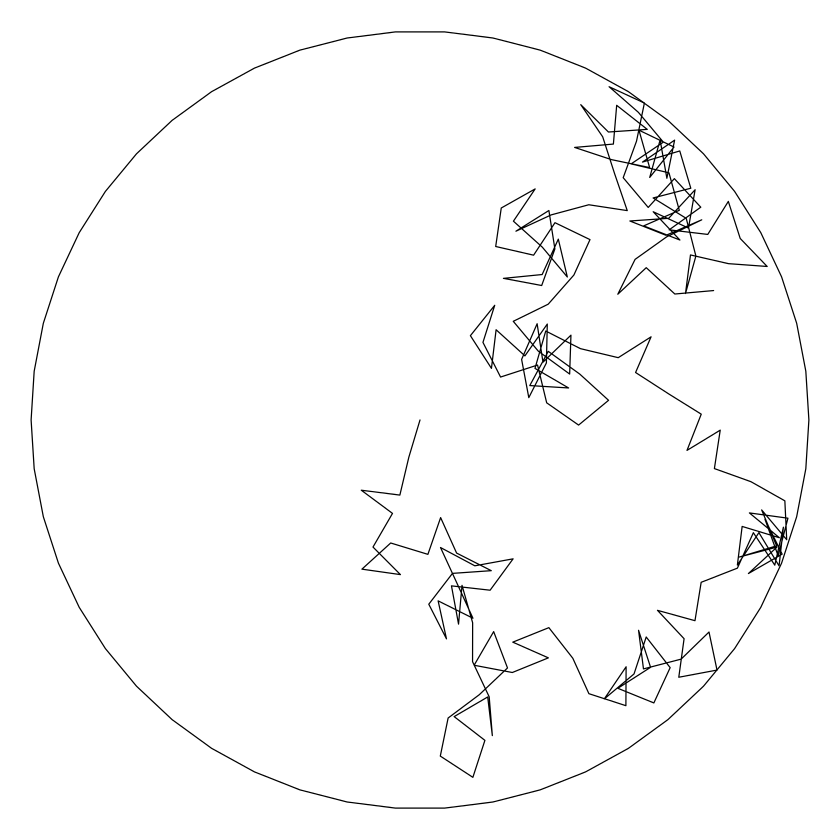

In [57]:
Rmax = 10
N = 200
coordenadas = matrix(nrow=N+1,ncol=2)
coordenadas[1,1] = coordenadas[1,2] = 0
dosPi = 2*pi
for (i in 2:(N+1)) {
    Rprueba = 1.1*Rmax
    while (Rprueba > Rmax) {
        xo = coordenadas[i-1,1]
        yo = coordenadas[i-1,2]
        theta = runif(1,-dosPi,dosPi)
        pasox = cos(theta)
        pasoy = sin(theta)
        x1 = xo + pasox
        y1 = yo + pasoy
        R = sqrt(x1^2 + y1^2) 
        if (R < Rmax) Rprueba = R
    }
coordenadas[i,1] = coordenadas[i-1,1] + pasox
coordenadas[i,2] = coordenadas[i-1,2] + pasoy
}

plot.new()
par(mar=c(0,0,0,0)) 
plot.window(c(-Rmax,Rmax), c(-Rmax,Rmax), asp=1,bty="n")
polygon(Rmax*cos(2*pi*(0:50/50)), Rmax*sin(2*pi*(0:50/50)))
lines(coordenadas[,1],coordenadas[,2])

3 . Ejemplo de como resolver  `f(x) = 0` usando el método de la bisección:

In [58]:
f <- function(y, a, n) {
        a^2 + y^2 + 2*a*y/(n-1) - (n-2)
    }

    a <- 0.5
    n <- 20
    b0 <- 0
    b1 <- 5*n

    #resolviendo por el metodo de la biseccion

    it <- 0
    eps <- .Machine$double.eps^0.25
    r <- seq(b0, b1, length=3)
    y <- c(f(r[1], a, n), f(r[2], a, n), f(r[3], a, n))
    if (y[1] * y[3] > 0)
        stop("f no tiene signos opuestos en los puntos finales")

    while(it < 1000 && abs(y[2]) > eps) {
        it <- it + 1
        if (y[1]*y[2] < 0) {
            r[3] <- r[2]
            y[3] <- y[2]
        } else {
            r[1] <- r[2]
            y[1] <- y[2]
        }
        r[2] <- (r[1] + r[3]) / 2
        y[2] <- f(r[2], a=a, n=n)
        print(c(r[1], y[1], y[3]-y[2]))
    }

[1]    0.000  -17.750 1876.316
[1]   0.0000 -17.7500 469.4079
[1]   0.0000 -17.7500 117.5164
[1]   0.00000 -17.75000  29.46135
[1]  3.125000 -7.819901 17.172081
[1]  3.125000 -7.819901  6.754986
[1]  3.906250 -2.285619  3.530081
[1]  3.906250 -2.285619  1.650599
[1]  4.1015625 -0.7113133  0.8348365
[1]  4.1015625 -0.7113133  0.4102657
[1]  4.1503906 -0.3058160  0.2057289
[1]  4.1748047 -0.1012793  0.1030135
[1]  4.17480469 -0.10127926  0.05139497
[1]  4.1809082 -0.0499588  0.0257068
[1]  4.18395996 -0.02427063  0.01285573
[1]  4.185485840 -0.011419556  0.006428445
[1]  4.186248779 -0.004992275  0.003214368
[1]  4.186630249 -0.001778197  0.001607221
[1]  4.1868209839 -0.0001710497  0.0008036194
[1]  4.1868209839 -0.0001710497  0.0004018029
[1]  4.1868209839 -0.0001710497  0.0002008997


4 .`Profiling` significar  encontrar donde un  programa que acabamos de escribir gasta la mayor parte de  tiempo, para repensar, reescribir o reescribir en C aquellas partes que consumen mucho tiempo. Es muy útil cuando R se utiliza para prototipos (es decir, para probar algoritmos, para ver si realmente funcionan, antes de usarlos en aplicaciones reales).

El `system.time` le indica cuánto tiempo gastamos dentro de un comando.

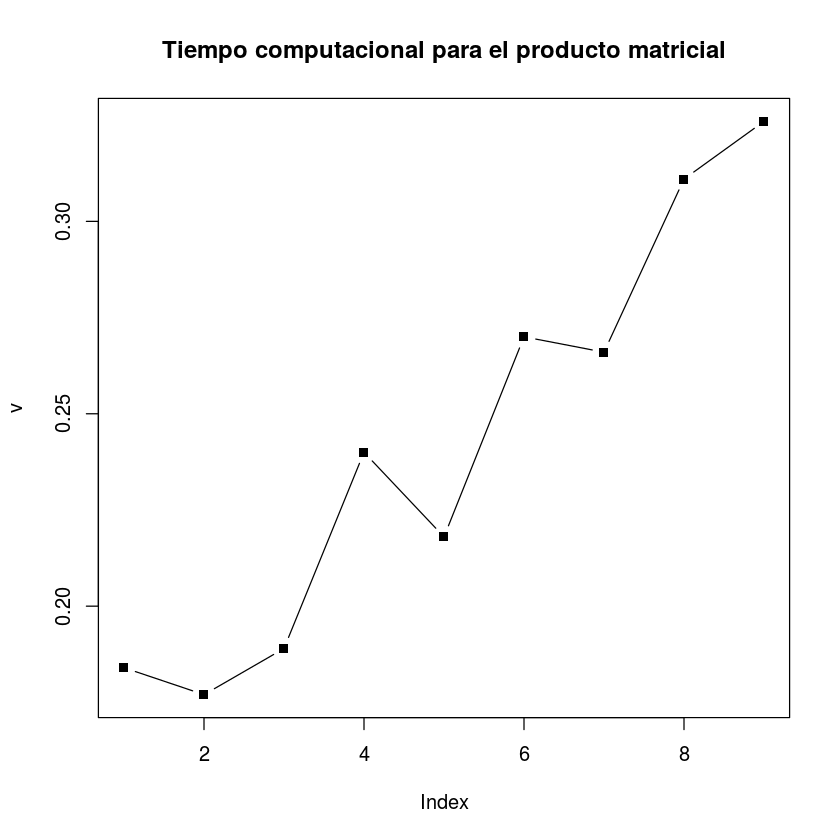

In [60]:
varias.veces <- function (n, f, ...) {
    for (i in 1:n) {
        f(...)
  }
}

matriz.multiplicacion <- function (s) {
    A <- matrix(1:(s*s), nr=s, nc=s) 
    B <- matrix(1:(s*s), nr=s, nc=s) 
    C <- A %*% B
}

v <- NULL
for (i in 2:10) {
    v <- append(
    v, 
    system.time( 
      several.times( 
        10000, 
        matriz.multiplicacion, 
        i 
      )
    ) [1]
  )
}
plot(v, type = 'b', pch = 15,  main = "Tiempo computacional para el producto matricial")

5 . Ejemplo de utilización del método de aceptado-rechazado. [acceptance-Rejection Method](http://www.columbia.edu/~ks20/4703-Sigman/4703-07-Notes-ARM.pdf) en R.

In [61]:
n <- 1000
k <- 0      #contador para accepted(aceptado)
j <- 0      #iteraciones
y <- numeric(n)

while (k < n) {
    u <- runif(1)
    j <- j + 1
    x <- runif(1)  
    if (x * (1-x) > u) {# Aceptamos  x
        k <- k + 1
        y[k] <- x
        }
    }
j

#comparamos  percentiles

p <- seq(.1, .9, .1)
Qhat <- quantile(y, p)   # cuantiles de muestra 
Q <- qbeta(p, 2, 2)      # cuantiles teoricos
se <- sqrt(p * (1-p) / (n * dbeta(Q, 2, 2)^2)) 
round(rbind(Qhat, Q, se), 3)

[1] 6065

,10%,20%,30%,40%,50%,60%,70%,80%,90%
Qhat,0.198,0.305,0.382,0.444,0.500,0.575,0.653,0.726,0.813
Q,0.196,0.287,0.363,0.433,0.500,0.567,0.637,0.713,0.804
se,0.010,0.010,0.010,0.011,0.011,0.011,0.010,0.010,0.010


6 . Muestra una simulación de decaimiento radioactivo

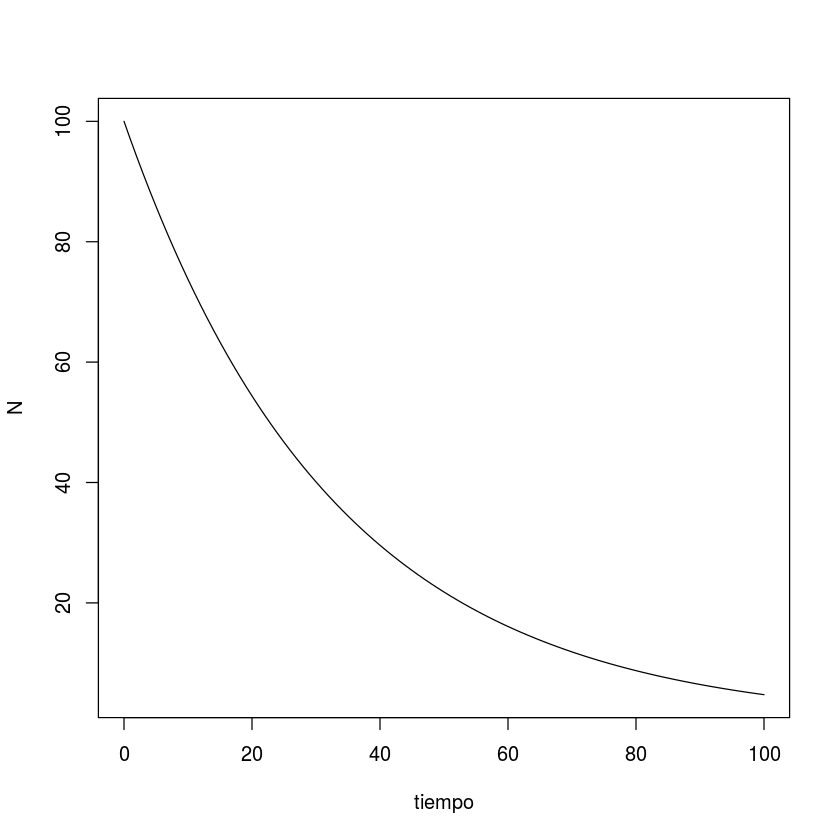

In [63]:
# Condiciones iniciales y definicion de variables 

tmin = 0; tmax = 100; dt = 1
n = (tmax - tmin)/dt + 1 
tiempo = seq(tmin, tmax, by = dt)
k = .03 #  Tasa constante de decaimiento
N0 = 100 # Numero inicial de atomos
N = N0 

# Corremos el bucle

for (i in 2:n) {
  dN = -k*N[i-1]*dt
  N[i] = N[i-1] + dN}

# Mostramos un grafico

plot(tiempo, N, type = "l")